In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

## Load training data

In [2]:
df_biome = pd.read_csv('./bd_mir_bioma_without_xy.csv')
df_region = pd.read_csv('./bd_mir_regiao_without_xy.csv')
df_soil = pd.read_csv('./bd_mir_solo_without_xy.csv')

In [3]:
df_biome = df_biome.drop(['ID_Unico','Bioma'],axis=1)
df_region = df_region.drop(['ID_Unico','Region_Name'],axis=1)
df_soil = df_soil.drop(['ID_Unico','Ordem.SIBCS'],axis=1)

In [4]:
df_total = pd.concat([df_biome,df_region,df_soil], axis=0)

In [5]:
df_total = pd.read_csv('./data_test.csv')

In [6]:
df_total.dropna()

,Carbon_gkg,4000,3995,3990,3985,3980,3975,3970,3965,3960,...,645,640,635,630,625,620,615,610,605,600
0,19.674246,0.077074,0.076753,0.076330,0.075732,0.075193,0.074737,0.074253,0.073765,0.073471,...,0.002092,0.001976,0.002311,0.002436,0.001832,0.002312,0.002543,0.003052,0.003337,0.003882
1,20.252900,0.076412,0.076009,0.075634,0.075148,0.074725,0.074331,0.073796,0.073342,0.073069,...,0.002044,0.001640,0.001900,0.002240,0.002273,0.002661,0.002736,0.002190,0.002609,0.003427
2,35.297912,0.074155,0.073933,0.073570,0.072974,0.072537,0.072082,0.071611,0.071267,0.071008,...,0.002417,0.002007,0.002053,0.002061,0.002022,0.002449,0.002364,0.002387,0.002924,0.003534
3,1.700000,0.100635,0.100200,0.099768,0.100440,0.100036,0.099450,0.099204,0.098982,0.098344,...,0.008065,0.007592,0.007852,0.007304,0.007934,0.007512,0.007624,0.007010,0.006702,0.006797
4,21.988863,0.071408,0.071106,0.070715,0.070161,0.069682,0.069334,0.068958,0.068668,0.068381,...,0.001694,0.001890,0.001845,0.001862,0.001617,0.001496,0.001929,0.002157,0.002047,0.002599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.370571,0.085191,0.085110,0.084900,0.085014,0.084713,0.084590,0.084288,0.084230,0.083948,...,0.005930,0.006440,0.006565,0.006520,0.005869,0.007090,0.006558,0.006300,0.006300,0.005270
1796,27.100000,0.094866,0.095160,0.095040,0.095340,0.094640,0.094820,0.094550,0.094670,0.094600,...,0.004450,0.004330,0.004830,0.004340,0.004820,0.004380,0.005320,0.003900,0.005540,0.004400
1797,22.700000,0.060975,0.060880,0.060180,0.060280,0.060420,0.060490,0.059650,0.059780,0.060120,...,0.004770,0.004430,0.004640,0.005170,0.004240,0.003540,0.003680,0.004880,0.004890,0.004830
1798,0.221244,0.074283,0.073500,0.072910,0.073390,0.073132,0.072140,0.072318,0.072710,0.072172,...,0.003650,0.003710,0.003837,0.004330,0.004192,0.004890,0.003712,0.003270,0.003116,0.003210


In [7]:
df_total[df_total.isnull().T.any()]

,Carbon_gkg,4000,3995,3990,3985,3980,3975,3970,3965,3960,...,645,640,635,630,625,620,615,610,605,600
622,10.440835,0.062123,0.062133,0.061957,0.061843,0.06151,0.061367,0.06146,0.061173,0.061267,...,0.004347,0.00429,0.004353,0.005003,0.00527,0.005347,0.006,0.005793,0.005323,NaN
1214,10.440835,0.062123,0.062133,0.061957,0.061843,0.06151,0.061367,0.06146,0.061173,0.061267,...,0.004347,0.00429,0.004353,0.005003,0.00527,0.005347,0.006,0.005793,0.005323,NaN


In [8]:
df_total = df_total.drop(index=[622,1214])

In [9]:
df_total_data = df_total.drop(['Carbon_gkg'],axis=1)
df_total_target = pd.DataFrame(df_total,columns=['Carbon_gkg'])

In [10]:
df_total_data

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,0.077074,0.076753,0.076330,0.075732,0.075193,0.074737,0.074253,0.073765,0.073471,0.073171,...,0.002092,0.001976,0.002311,0.002436,0.001832,0.002312,0.002543,0.003052,0.003337,0.003882
1,0.076412,0.076009,0.075634,0.075148,0.074725,0.074331,0.073796,0.073342,0.073069,0.072725,...,0.002044,0.001640,0.001900,0.002240,0.002273,0.002661,0.002736,0.002190,0.002609,0.003427
2,0.074155,0.073933,0.073570,0.072974,0.072537,0.072082,0.071611,0.071267,0.071008,0.070740,...,0.002417,0.002007,0.002053,0.002061,0.002022,0.002449,0.002364,0.002387,0.002924,0.003534
3,0.100635,0.100200,0.099768,0.100440,0.100036,0.099450,0.099204,0.098982,0.098344,0.098726,...,0.008065,0.007592,0.007852,0.007304,0.007934,0.007512,0.007624,0.007010,0.006702,0.006797
4,0.071408,0.071106,0.070715,0.070161,0.069682,0.069334,0.068958,0.068668,0.068381,0.067901,...,0.001694,0.001890,0.001845,0.001862,0.001617,0.001496,0.001929,0.002157,0.002047,0.002599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.085191,0.085110,0.084900,0.085014,0.084713,0.084590,0.084288,0.084230,0.083948,0.083570,...,0.005930,0.006440,0.006565,0.006520,0.005869,0.007090,0.006558,0.006300,0.006300,0.005270
1796,0.094866,0.095160,0.095040,0.095340,0.094640,0.094820,0.094550,0.094670,0.094600,0.093910,...,0.004450,0.004330,0.004830,0.004340,0.004820,0.004380,0.005320,0.003900,0.005540,0.004400
1797,0.060975,0.060880,0.060180,0.060280,0.060420,0.060490,0.059650,0.059780,0.060120,0.059800,...,0.004770,0.004430,0.004640,0.005170,0.004240,0.003540,0.003680,0.004880,0.004890,0.004830
1798,0.074283,0.073500,0.072910,0.073390,0.073132,0.072140,0.072318,0.072710,0.072172,0.071810,...,0.003650,0.003710,0.003837,0.004330,0.004192,0.004890,0.003712,0.003270,0.003116,0.003210


In [11]:
df_total_target

,Carbon_gkg
0,19.674246
1,20.252900
2,35.297912
3,1.700000
4,21.988863
...,...
1795,1.370571
1796,27.100000
1797,22.700000
1798,0.221244


## Load test data

In [12]:
df_test_biome = pd.read_csv('./bd_mir_biome_test_without_XY.csv')
df_test_region = pd.read_csv('./bd_mir_regiao_test_without_XY.csv')
df_test_soil = pd.read_csv('./bd_mir_solo_test_without_XY.csv')

In [13]:
df_test_biome = df_test_biome.drop(['ID','ID_Unico','Bioma'],axis=1)
df_test_region = df_test_region.drop(['ID','ID_Unico','Region_Name'],axis=1)
df_test_soil = df_test_soil.drop(['ID','ID_Unico','Ordem.SIBCS'],axis=1)

In [14]:
df_test_soil_data = df_test_soil.drop(['Carbon_gkg'],axis=1)
df_test_soil_target = pd.DataFrame(df_test_soil,columns=['Carbon_gkg'])

In [15]:
df_test_soil_data = df_test_soil_data.apply(lambda x:np.log(1/x))

In [16]:
X = pipeline.fit_transform(df_test_soil_data)
df_test_soil_data_tr = pd.DataFrame(X,columns=df_test_soil_data.columns)

NameError: name 'pipeline' is not defined

In [ ]:
df_test_biome_data = df_test_biome.drop(['Carbon_gkg'],axis=1)
df_test_biome_target = pd.DataFrame(df_test_biome,columns=['Carbon_gkg'])

In [ ]:
df_test_biome_data = df_test_biome_data.apply(lambda x:np.log(1/x))

In [ ]:
X = pipeline.fit_transform(df_test_biome_data)
df_test_biome_data_tr = pd.DataFrame(X,columns=df_test_biome_data.columns)

In [ ]:
df_test_region_data = df_test_region.drop(['Carbon_gkg'],axis=1)
df_test_region_target = pd.DataFrame(df_test_region,columns=['Carbon_gkg'])

In [17]:
df_test_region_data = df_test_region_data.apply(lambda x:np.log(1/x))

NameError: name 'df_test_region_data' is not defined

In [18]:
X = pipeline.fit_transform(df_test_region_data)
df_test_region_data_tr = pd.DataFrame(X,columns=df_test_region_data.columns)

NameError: name 'pipeline' is not defined

In [158]:
df_test_total = pd.concat([df_test_biome,df_test_region,df_test_soil],axis = 0)

In [159]:
df_test_total_data = df_test_total.drop(['Carbon_gkg'],axis=1)
df_test_total_target = pd.DataFrame(df_test_total,columns=['Carbon_gkg'])

In [160]:
df_test_total_data = df_test_total_data.apply(lambda x:np.log(1/x))

In [161]:
X = pipeline.fit_transform(df_test_total_data)
df_test_total_data_tr = pd.DataFrame(X,columns=df_test_total_data.columns)

## Preprocess

In [19]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

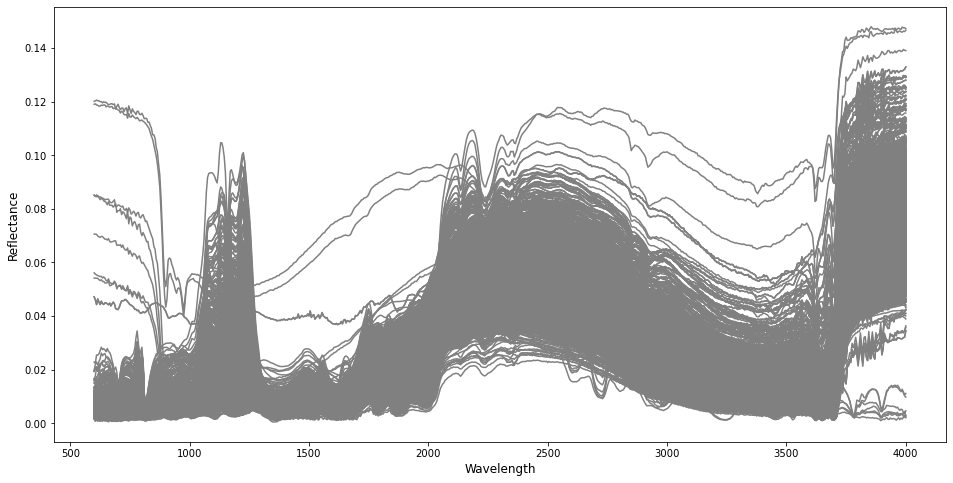

In [20]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_total_data)):
    
    test_row = df_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [21]:
index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

In [22]:
index_ex = df_total_data['600'].idxmax()
df_total_data = df_total_data.drop(index=index_ex)
df_total_target = df_total_target.drop(index=index_ex)

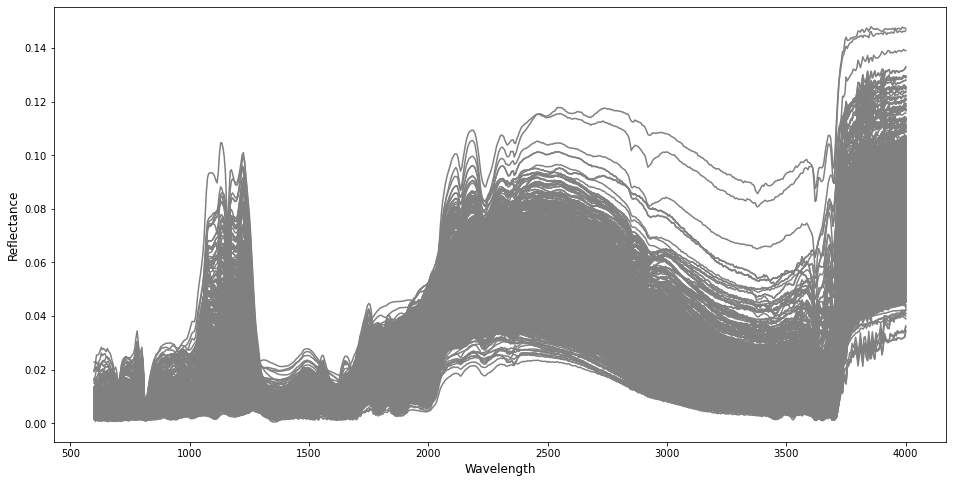

In [23]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_total_data)):
    
    test_row = df_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [24]:
#Converting data from reflectance values to absorbance values
from math import log, exp

df_total_data = df_total_data.apply(lambda x:np.log(1/x))

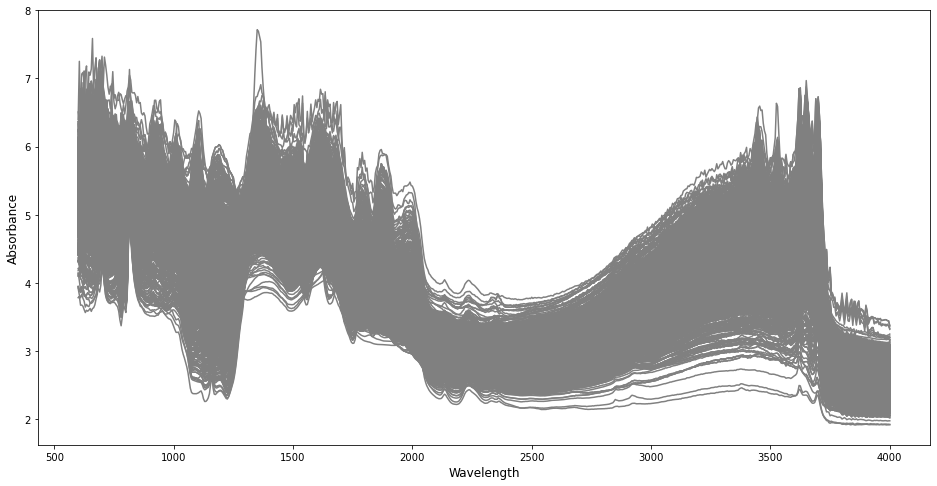

In [25]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_total_data)):
    
    test_row = df_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [26]:
df_total_data

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,2.562994,2.567158,2.572691,2.580554,2.587701,2.593775,2.600278,2.606865,2.610868,2.614956,...,6.169729,6.226810,6.070082,6.017461,6.302540,6.069472,5.974260,5.791931,5.702825,5.551280
1,2.571618,2.576908,2.581849,2.588296,2.593940,2.599222,2.606454,2.612622,2.616348,2.621067,...,6.192665,6.412921,6.266091,6.101397,6.086838,5.929100,5.901322,6.123870,5.948932,5.676148
2,2.601597,2.604602,2.609512,2.617655,2.623661,2.629955,2.636504,2.641329,2.644966,2.648744,...,6.025164,6.210987,6.188246,6.184373,6.203841,6.012236,6.047353,6.037633,5.834920,5.645319
3,2.296255,2.300587,2.304908,2.298195,2.302225,2.308100,2.310577,2.312817,2.319284,2.315407,...,4.820222,4.880660,4.846987,4.919333,4.836598,4.891254,4.876454,4.960418,5.005349,4.991323
4,2.639346,2.643590,2.649096,2.656967,2.663815,2.668816,2.674264,2.678474,2.682654,2.689702,...,6.380483,6.271020,6.295043,6.286346,6.427449,6.504663,6.250931,6.139057,6.191471,5.952442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2.462854,2.463806,2.466281,2.464944,2.468483,2.469939,2.473520,2.474204,2.477553,2.482071,...,5.127731,5.045227,5.025965,5.032881,5.137996,4.949070,5.027064,5.067206,5.067150,5.245725
1796,2.355287,2.352196,2.353457,2.350306,2.357675,2.355775,2.358626,2.357358,2.358098,2.365418,...,5.414851,5.442188,5.332909,5.439881,5.334981,5.430707,5.236282,5.546779,5.195761,5.426151
1797,2.797289,2.798851,2.810415,2.808755,2.806435,2.805277,2.819261,2.817084,2.811413,2.816750,...,5.345409,5.419356,5.373041,5.264883,5.463192,5.643629,5.604843,5.322610,5.320563,5.332909
1798,2.599871,2.610476,2.618529,2.611974,2.615484,2.629147,2.626684,2.621276,2.628703,2.633732,...,5.613028,5.596723,5.562981,5.442188,5.474543,5.320563,5.596267,5.722965,5.771300,5.741484


In [27]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

v = scipy.signal.savgol_filter(df_total_data,21,3)
for i in range(len(df_total_data)):
    for j in range(len(df_total_data.iloc[i])):
        df_total_data.iloc[i][j] = v[i][j]

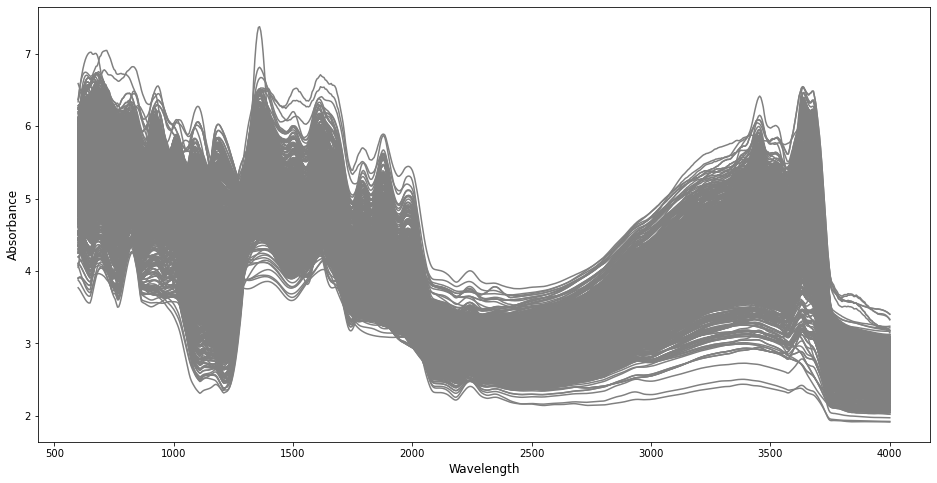

In [28]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_total_data)):
    
    test_row = df_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [28]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [29]:
X = pipeline.fit_transform(df_total_data)
df_total_data_tr = pd.DataFrame(X,columns=df_total_data.columns)
df_total_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.068384,-0.037612,-0.012576,0.007396,0.022978,0.034833,0.043618,0.049979,0.054553,0.057971,...,1.358039,1.344964,1.325518,1.298594,1.262348,1.213662,1.147267,1.054488,0.922083,0.733655
1,-0.023430,0.002302,0.023289,0.040093,0.053275,0.063386,0.070972,0.076568,0.080700,0.083892,...,1.421450,1.394862,1.371655,1.352091,1.336300,1.323964,1.313626,1.301303,1.278008,1.226856
2,0.107451,0.133459,0.154478,0.171108,0.183942,0.193559,0.200522,0.205387,0.208697,0.210990,...,1.382291,1.369668,1.356462,1.342909,1.328957,1.313894,1.295619,1.269252,1.224890,1.145559
3,-1.237919,-1.249553,-1.257423,-1.262101,-1.264084,-1.263811,-1.261677,-1.258046,-1.253262,-1.247655,...,-1.169605,-1.146217,-1.122118,-1.098062,-1.074633,-1.052027,-1.029572,-1.004777,-0.971687,-0.919072
4,0.280222,0.308184,0.330415,0.347628,0.360514,0.369742,0.375962,0.379807,0.381898,0.382847,...,1.657394,1.677870,1.704779,1.738051,1.777521,1.822401,1.870130,1.913952,1.938434,1.913740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,-0.495349,-0.506878,-0.515491,-0.521590,-0.525550,-0.527719,-0.528422,-0.527973,-0.526673,-0.524817,...,-0.734549,-0.755625,-0.773494,-0.785817,-0.789595,-0.780625,-0.752643,-0.696107,-0.597161,-0.439213
1785,-0.987147,-1.004645,-1.018563,-1.029422,-1.037688,-1.043776,-1.048068,-1.050914,-1.052649,-1.053594,...,-0.063221,-0.085158,-0.104762,-0.119623,-0.126837,-0.122670,-0.102084,-0.058251,0.017344,0.132367
1786,1.034638,1.024363,1.014662,1.005552,0.996993,0.988899,0.981157,0.973634,0.966189,0.958672,...,-0.029774,-0.013523,0.001946,0.016437,0.029699,0.041373,0.050890,0.057303,0.059064,0.053928
1787,0.152854,0.147693,0.144562,0.143209,0.143374,0.144798,0.147216,0.150368,0.153988,0.157815,...,0.066934,0.052391,0.054125,0.077889,0.131013,0.223125,0.366891,0.578041,0.872322,1.254153


## Model 1

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [56]:
scores = []
ne = [100,500,1000]
for n in ne:
    forest_total = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_total,df_total_data_tr,df_total_target,cv=5)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

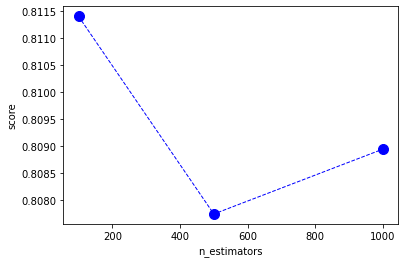

[0.8114054227364982, 0.80774308280878, 0.8089451393548177]

In [57]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [58]:
forest_total = RandomForestRegressor(n_estimators=100)
forest_total.fit(df_total_data_tr, df_total_target)

<ipython-input-58-52cc6cca72f8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_total.fit(df_total_data_tr, df_total_target)


RandomForestRegressor()

In [36]:
import joblib
from sklearn.metrics import r2_score

In [67]:
Y = forest_total.predict(df_test_total_data_tr)
m = mean_squared_error(df_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_total_target, Y)))

root_mean_squared_error: 4.568975400945118
R2: 0.7506988707690243


In [68]:
joblib.dump(forest_total, './model/total/forest_total.pkl')

['./model/total/forest_total.pkl']

In [32]:
from sklearn.decomposition import PCA
from sklearn import linear_model

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

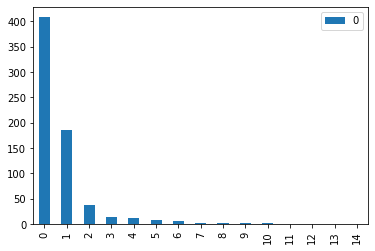

In [33]:
#PCA
df_total_data_tr_ = df_total_data_tr
ew_total, ev_total = np.linalg.eig(np.cov(df_total_data_tr_.T))
ew_total_order = np.argsort(ew_total)[::-1]
ew_total_sort = ew_total[ew_total_order]
ev_total_sort = ev_total[:,ew_total_order]
pd.DataFrame(ew_total_sort[0:15]).plot(kind='bar')

In [130]:
pca_total = PCA(n_components=42)
pca_total.fit(df_total_data_tr)
df_total_data_tr_pca = pca_total.transform(df_total_data_tr)

ols_total = linear_model.LinearRegression()

ols_total.fit(df_total_data_tr_pca, df_total_target)

LinearRegression()

In [131]:
df_test_total_data_tr_pca = pca_total.transform(df_test_total_data_tr)
Y = ols_total.predict(df_test_total_data_tr_pca)
m = mean_squared_error(df_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_total_target, Y)))

root_mean_squared_error: 5.750846784073213
R2: 0.6050426500254311


In [133]:
joblib.dump(ols_total, './model/total/ols_total.pkl')

['./model/total/ols_total.pkl']

In [134]:
joblib.dump(pca_total, './model/total/pca_total.pkl')

['./model/total/pca_total.pkl']

In [132]:
#PLsR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [142]:
pls_model_total_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,15)}
gsearch = GridSearchCV(pls_model_total_setup, param_grid)
pls_model_total = gsearch.fit(df_total_data_tr,df_total_target)

In [143]:
Y = pls_model_total.predict(df_test_total_data_tr)
m = mean_squared_error(df_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_total_target, Y)))

root_mean_squared_error: 5.810178818404892
R2: 0.596850984556412


In [165]:
joblib.dump(pls_model_total, './model/total/pls_model_total.pkl')

['./model/total/pls_model_total.pkl']

In [163]:
es = joblib.load('./model/total/forest_total.pkl')

In [164]:
Y = es.predict(df_test_soil_data_tr)
m = mean_squared_error(df_test_soil_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_soil_target, Y)))

root_mean_squared_error: 6.508555115701758
R2: 0.2231935013196824


In [172]:
Y = es.predict(df_test_biome_data_tr)
m = mean_squared_error(df_test_biome_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_biome_target, Y)))

root_mean_squared_error: 3.769612731225027
R2: 0.7966824475964466


In [173]:
Y = es.predict(df_test_region_data_tr)
m = mean_squared_error(df_test_region_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_region_target, Y)))

root_mean_squared_error: 6.009085012391191
R2: 0.6776958410322782
